# **Regularised Linear Regression**

## What is Regularization?

 Regularization refers to techniques in which we can induce some information to our models in order to minimize the adjusted loss function and prevent overfitting.

 simply the word regularization also says to regulise something which is exceeding and bring back to its normal state.



## Types of Regularization: 
 1. Ridge Regression (L2 Regularization)
 2. Lasso Regression (L1 Regularization) 
 3. Elastic Net (combination of L1 and L2)

##  **1 Ridge Regression (L2 Regularization)**

Whenever a model is The whole idea of Linear Regression is to find a best fit line i.e Y=mx + c and we find the value of m and c.


Mathematically, if we want to reduce overfitting, then slope m should be decreased.

if we have two datasets, training and testing (80:20) and our best fit line 1(Ln) focused on the training data and overfitting took place but if we had a best fit line 2 (Lr) that focused more on the test data then it could have better predictions.

Then our aim is to make our model convince to choose best fit line 2 (Lr) instead of best fit line 1 (Ln). How would we do this? Simple....with the help of   **Ridge Regression or L2 Regularization.**

We know the LOSS FUNCTION for Linear Regression is:

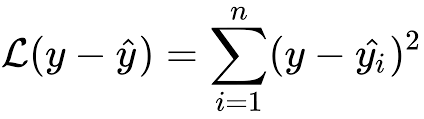

and since we already know that 'Regularization refers to a technique in which we can add some information in order to minimize the adjusted loss function and prevent overfitting.'

so the extra thing/info we are adding to regularize the loss function is  λ(β^2)

then the formula for LOSS FUNCTION becomes:

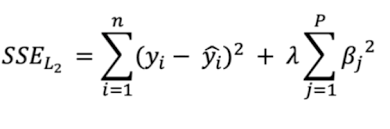

The comparision that the model makes between the loss of the two lines and then it has no choice but to choose Lr as the best fit line.

Even though this line makes error in the training data but still the model will choose it as the best fit line due to the extra info that we added to it i.e λ(β^2)  also known as SHRINKAGE COEFFICIENT.

The whole idea was that although the Bias increased a little but the Variance decreased significantly and this is where we see Regularisation happening.

**Why is Ridge Regression called L2 Regularization?**

here if we had 3 input columns we will add ,  λ(β1^2 + β2^2 + β3^2). Since we are always using squares to multiply (β1^2 , β2^2 , β3^2) it is called L2 Regularization.

**Inference:** 

In ridge regression we are addind a certain value to the loss function to decrease the slope of the best fit line which increases the bias but decreases the variance and gives good results with the test data and reduces the overfitting.

# Comparision between Ridge Regression and Linear Regression

## Code: Linear Regression

In [33]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# using a inbuilt dataset
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, r2_score , mean_squared_error

In [34]:
data = load_diabetes()

#looking at the dataset
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [35]:
x = data.data
y = data.target

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [37]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [38]:
prediction = model.predict(x_test)

In [39]:
print('R2 score: ',r2_score(y_test,prediction))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,prediction)))

R2 score:  0.4399387660024645
RMSE:  55.62759745954073


## Code: Ridge Regression

doing the same thing using  Ridge Regression to compare the results!

In [40]:
from sklearn.linear_model import Ridge

In [41]:
Ridge_Regression = Ridge(alpha=0.0001)   #lambda in our formula

In [42]:
Ridge_Regression.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [43]:
prediction2 = Ridge_Regression.predict(x_test)

In [44]:
print('R2 score: ',r2_score(y_test,prediction2))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,prediction2)))

R2 score:  0.4400478299174273
RMSE:  55.622180856334715


The Ridge Regression is performing slightly better as compared to LinearRegression.

## Choosing a Best Fit Line for a data using Ridge Regression 

In [45]:
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 

In [46]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

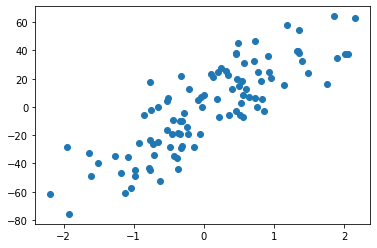

In [47]:
plt.scatter(x,y)

In [48]:
lr = LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [49]:
#putting alpha as 10
rr = Ridge(alpha=10)
rr.fit(x,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


We can see the value of slope has decrased from [27.82809103] to [24.9546267]

In [50]:
#puttng alpha as 100
rr1 = Ridge(alpha=100)
rr1.fit(x,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


as the value of alpha increased the slope further decreased to [12.93442104]

comparing the three regression lines by plotting them.

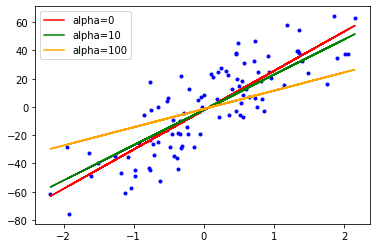

In [51]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color= 'red',label = 'alpha=0')
plt.plot(x,rr.predict(x),color= 'green',label = 'alpha=10')
plt.plot(x,rr1.predict(x),color= 'orange',label = 'alpha=100')
plt.legend()

**Inference:**

the red line is the LinearRegression line with no regularisation.

the green line is the RidgeRegression line with alpha=10

the orange line is the RidgeRegression line with alpha=100 but it is reaching at the stage of underfitting.


we can also say the optimum value of alpha should be between 1 to 10


##  takeaways from Ridge Regression

1 How the coefficients get affected on increasing the value of lambda?


--> all the coefficients shrinks and tends towards zero but not zero.

2 Higher values are impacted more.

3 Bias Variance Tradeoff.

--> Bias and Variance both depend on Lambda so if the value of lambda is decreased, the Bias decreases but the Variance increases(overfitting) and if the value of lambda is increased  Bias increases but the Variance decreases(underfitting).

4 Impact of regularization on the Loss Function.


--> minimizes the loss function.



## **2 Lasso Regression (L1 Regularization)** 

Lasso Regression also helps us reducing overfitting, lets see how..


The loss function in L2 regularization was written as

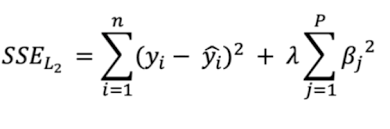

Lasso regression is just one such variation of this loss function.

In Lasso Regression, we again have MSE and we again add a term to it i.e λ|β| 

which is also known as **Penalty**.

so the formula becomes:

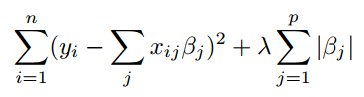

The only difference between Ridge Regression and Lasso Regression is that we use square of the added value in Ridge Regression and we use an absolute value in Lasso Regression.

## Code: Lasso Regression

In [52]:
#importing important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

[27.26751275]
-3.2338937304526896


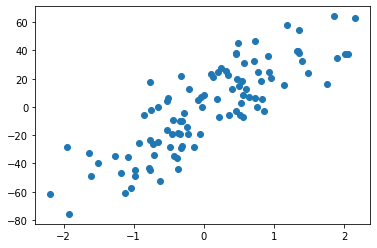

In [53]:
x,y = make_regression(n_samples = 100, n_features = 1,n_informative = 1, n_targets = 1, noise = 20, random_state=13 )

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 )

plt.scatter(x,y)

reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)


If the value of lambda is much increased then the other term ω minimizes and it is a condition of underfitting.

 On the other hand if the value of lambda is much decreased or zero then the entire penalty term will be removed and it will behave as Linear Regression, case of overfitting. 

<ipython-input-54-5ee4dc1cfd5b>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(x_train , y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+04, tolerance: 7.676e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


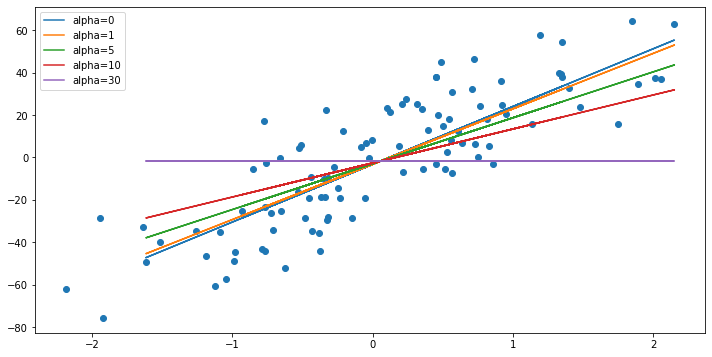

In [54]:
alphas = [0,1,5,10,30]             #this is lambda in our formula
plt.figure(figsize=(12,6))
plt.scatter(x,y)
for i in alphas:
  L = Lasso(alpha = i)
  L.fit(x_train , y_train)
  plt.plot(x_test,L.predict(x_test),label= 'alpha={}'.format(i))
plt.legend()
plt.show()

**Inference:** We see the green line which refers to alpha = 0, but as the value of alpha(λ) is increased the slope tends to decrease. The slope = 0 for alpha(λ) = 30

 

* Also note that in Ridge Regression, the coefficient can never be equal to zero, it can be close to zero but this is not the same in case of Lasso Regression,the coefficients can be close and equal to zero

This is a huge advantage of Lasso Regression because when we work with high dimensional data, overfitting is very common , so if we apply Ridge Regression all coefficients will exist even after setting the value of lambda is very high.

But in the case of Lasso Regression, in a high dimensional data when the value of lambda is very high, the unwanted coefficients turn out to be zero.

So, we can also say that Lasso Regression performs **feature selection** and decreases the dimensionality of data.




Therefore, if you are working with a high dimensional data, Lasso Regression can be preferred over Ridge Regression.

## Bias and Variance in Lasso Regression

If you increase the value of lambda the Bias increases and the variance decreases, the slope decreases on increasing lambda and so does overfitting.

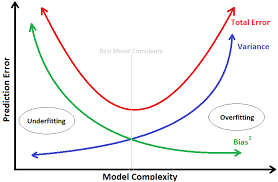

(complexity is Lambda)

#Why does Lasso Regression create sparcity?

**What is sparcity?**

sparcity is The lasso penalty that will force some of the coefficients quickly to turn out zero or simply increasing the value of alpha(λ) due to which some coefficients turn out to be zero. 

This means that variables are removed from the model, hence is known as sparsity.







Lasso regression is nothing but an ordinary least squares problem with a constraint that computes the L1 norm of the model parameters. For this reason, lasso regression adds constraints to the optimization problem which have corners. For a 2D case, the constraint region would look like a diamond. When the optimal values fall on the corners, then the model parameter becomes zero which leads to a sparse solution


Or we can say the lambda is in the Numerator in Lasso Regression thus it can make the whole term zero


**Why does this not happen in Ridge Regression?**

The lambda is in the denominator in Ridge Regression, thus it is not able to make the entire term zero.

## **Elastic Net Regression(combination of L1 and L2)**

**Ridge Regression: Loss function + square of penalty term**

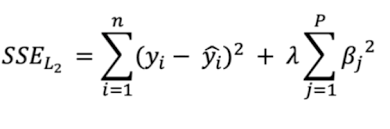


**Lasso Regression:  Loss function + absolute value of penalty term**




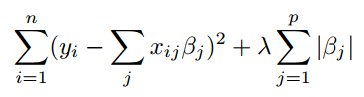



## Then the Elastic Net Regression formula becomes: 

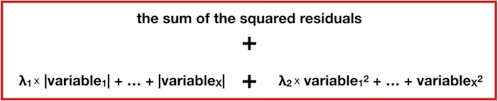

## When is elastic net regression used?

1 whenever we are not able to predict weather to use L1 regularization or L2 regularization then Elastic Net Regression comes into use which is a combination of both L1 and L2.

2  On huge datasets.

3 whenever the input columns have multi-collinearity. (dependent on each other)


## Code: elastic net regression

In [59]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [61]:
x,y = load_diabetes(return_X_y = True)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
#Linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [64]:
#Ridge
reg = Ridge(alpha=0.1)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4519973816947851

In [65]:
#Lasso
reg = Lasso(alpha=0.01)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4411227990495633

In [66]:
#elastic net
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)    # l1_ratio=0.9 means more weightage is given to Ridge as compared to Lasso
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4531493801165679